In [42]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from sklearn.utils import shuffle

In [43]:
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model history")
    plt.ylabel("value")
    plt.xlabel("epoch")
    plt.legend(["train", "val", "train loss", "val loss"], loc="upper left")
    plt.show()


In [44]:
test_size = 100
x_train, y_train = np.load("x_train50x50.npz")['arr_0'], np.load("y_train50x50.npz")['arr_0']
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = x_train[-test_size:], y_train[-test_size:]
x_train, y_train = x_train[:-test_size], y_train[:-test_size]
x_train = x_train
x_test = x_test
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9100, 50, 50, 3), (9100, 5), (100, 50, 50, 3), (100, 5))

In [45]:
# classifications = ['cpp_go_left', 'cpp_go_right', 'cpp_notgo', 'cpp_onlygo', 'cpp_onlyleft', 'cpp_onlyright', 'cpp_stop_line', 'cpp_stop_pic', 'notleft_sign', 'notright_pic', 'notstop_pic']classifications = ['no_right', 'no_stop', 'only_right', 'stop_line', 'stop_pic']
classifications = ['no_right', 'no_stop', 'only_right', 'stop_line', 'stop_pic']
len(classifications)

5

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.10/site-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.10/site-packages/keras/preprocessing/image.py:1671: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


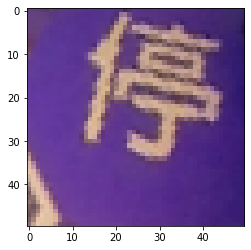

stop_pic


In [46]:
datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    featurewise_center=True,
    featurewise_std_normalization=True,
    channel_shift_range=10,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=30,
)

data = datagen.flow(x_train, y_train, batch_size=64)

n = 2
plt.imshow(data[n][0][0])
plt.show()
print(classifications[np.where(data[n][1][0]==1)[0][0]])

In [47]:
model = None
model = Sequential([
    layers.Input(shape=(50, 50, 3)),
    # layers.BatchNormalization(),
    
    layers.Conv2D(1024, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, kernel_size=(2, 2), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='sigmoid'),
    layers.Dense(256, activation='sigmoid'),
    layers.Dense(len(classifications), activation='softmax'),
])

model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 50, 50, 1024)      28672     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 25, 25, 1024)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 25, 25, 64)        262208    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 9216)              0         
                                                                 
 dense_30 (Dense)            (None, 512)             

Epoch 1/10


/var/folders/hl/fxxy2d3156l2j0q01gfmm_y00000gn/T/ipykernel_63650/2081540912.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(data,  epochs=10, verbose=1,
2022-08-28 13:48:04.835049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


143/143 [==============================] - ETA: 0s - loss: 0.2380 - accuracy: 0.7165

2022-08-28 13:48:52.071628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


143/143 [==============================] - 48s 331ms/step - loss: 0.2380 - accuracy: 0.7165 - val_loss: 0.1209 - val_accuracy: 0.9100
Epoch 2/10
143/143 [==============================] - 46s 325ms/step - loss: 0.0735 - accuracy: 0.9373 - val_loss: 0.1123 - val_accuracy: 0.9000
Epoch 3/10
143/143 [==============================] - 47s 326ms/step - loss: 0.0451 - accuracy: 0.9586 - val_loss: 0.0935 - val_accuracy: 0.9300
Epoch 4/10
143/143 [==============================] - 47s 328ms/step - loss: 0.0275 - accuracy: 0.9778 - val_loss: 0.0890 - val_accuracy: 0.9100
Epoch 5/10
143/143 [==============================] - 47s 325ms/step - loss: 0.0230 - accuracy: 0.9803 - val_loss: 0.0806 - val_accuracy: 0.9500
Epoch 6/10
143/143 [==============================] - 46s 322ms/step - loss: 0.0233 - accuracy: 0.9805 - val_loss: 0.0745 - val_accuracy: 0.9500
Epoch 7/10
143/143 [==============================] - 46s 323ms/step - loss: 0.0155 - accuracy: 0.9867 - val_loss: 0.0757 - val_accuracy: 0.9

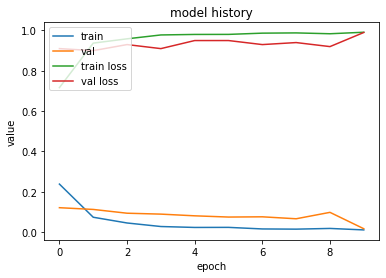

Test:
Loss: 0.016565818339586258
Accuracy: 0.9899999499320984


In [48]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
hist = model.fit_generator(data,  epochs=3, verbose=1,
                           validation_data=(x_test, y_test))
loss, accuracy = model.evaluate(x_test, y_test)
plot_hist(hist)
print('Test:')
print('Loss: %s\nAccuracy: %s' % (loss, accuracy))


In [49]:
model.predict(np.array([np.zeros((50, 50, 3))]))

1/1 [==============================] - 0s 59ms/step


2022-08-28 14:04:32.771136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[2.8645358e-04, 3.5769133e-06, 2.6088099e-05, 9.9967766e-01,
        6.2444019e-06]], dtype=float32)

In [50]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/hl/fxxy2d3156l2j0q01gfmm_y00000gn/T/tmp59h0rpk0/assets


INFO:tensorflow:Assets written to: /var/folders/hl/fxxy2d3156l2j0q01gfmm_y00000gn/T/tmp59h0rpk0/assets
2022-08-28 14:04:41.474365: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-08-28 14:04:41.474380: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-08-28 14:04:41.474469: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/hl/fxxy2d3156l2j0q01gfmm_y00000gn/T/tmp59h0rpk0
2022-08-28 14:04:41.475475: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-08-28 14:04:41.475487: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /var/folders/hl/fxxy2d3156l2j0q01gfmm_y00000gn/T/tmp59h0rpk0
2022-08-28 14:04:41.480097: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-08-28 14:04:41.564017: I tensorflow/cc/saved_model/loader.cc:212] Running initialization

In [51]:
import cv2
from glob import glob
f_list = glob(f"./*.png")
test = []
for pic in f_list:
  img = cv2.imread(pic, cv2.IMREAD_UNCHANGED)
  img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
  test.append(np.array(img))
  plt.imshow(img)
  plt.show()
  predict = model.predict(np.array([img]))
  print(classifications[predict.argmax()], f"{predict.max() * 100}%")
  

ModuleNotFoundError: No module named 'cv2'